### I. Define full pipeline OCR

In [2]:
%load_ext autoreload
%autoreload 2

from text_detection.detector import TextDetector
from text_recognition.recognizer import TextRecognizer


from PIL import Image
import os
import numpy
import cv2
import json
import csv
import regex as re

from matplotlib import pyplot as plt

In [3]:
td = TextDetector()
tr = TextRecognizer()

def recognize_from_path_image(path_image):
    
    try:
        image = Image.open(path_image).convert('RGB')
        _, _, result_as_dict = td.detect(image)

        #         for bounding_boxes_image in bounding_boxes_images:
        #             plt.imshow(bounding_boxes_image)
        #             plt.show()
        data, scripts = tr.recognize(data=result_as_dict, show_status = False)        
        # print(scripts)
        output = ""
        for script in scripts:
            # remove ignored characters
            script__ = re.sub('[^A-Za-z0-9 ]+', '', script)
            output = output + ' ' + script__
    except Exception as e:
        print(f"Error: {e}")
        return None, None, None
    return data, scripts, output

Namespace(cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/giangnv/.paddleocr/2.1/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_thresh=0.3, det_db_unclip_ratio=1.6, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/giangnv/.paddleocr/2.1/det/en', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='vi', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=6, rec_char_dict_path='./ppocr/utils/dict/latin_dict.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='/home/giangnv/.paddleocr/2.1/rec/latin', use_angle_cls=False, use_dilation=False, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)
File exists: /home/giangnv/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-133

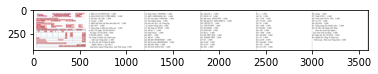

In [4]:
path_image = "./test/images/0001.png"
data, scripts, output = recognize_from_path_image(path_image)

In [5]:
data

{'original_image': './tmp/output/detection/tmp/084a0097055a4ee098e34434e05cd4d6.jpg',
 'boxes': [{'index': 0,
   'path_file': './tmp/output/detection/image/084a0097055a4ee098e34434e05cd4d6_000.jpg',
   'bounding_box': [652, 44, 789, 61],
   'org_bounding_box': [[654.0, 46.0],
    [787.0, 46.0],
    [787.0, 59.0],
    [654.0, 59.0]],
   'script': 'Mẫu số: 01GTKT0/001'},
  {'index': 1,
   'path_file': './tmp/output/detection/image/084a0097055a4ee098e34434e05cd4d6_001.jpg',
   'bounding_box': [296, 44, 580, 69],
   'org_bounding_box': [[301.0, 48.0],
    [576.0, 49.0],
    [576.0, 69.0],
    [300.0, 67.0]],
   'script': 'HÓA ĐƠN GTGT (TIỀN ĐIỆN)'},
  {'index': 2,
   'path_file': './tmp/output/detection/image/084a0097055a4ee098e34434e05cd4d6_002.jpg',
   'bounding_box': [651, 56, 753, 79],
   'org_bounding_box': [[654.0, 59.0],
    [750.0, 61.0],
    [750.0, 76.0],
    [654.0, 74.0]],
   'script': 'Kỷ hiệu: AE/18E'},
  {'index': 3,
   'path_file': './tmp/output/detection/image/084a0097055a

In [6]:
scripts

['Mẫu số: 01GTKT0/001',
 'HÓA ĐƠN GTGT (TIỀN ĐIỆN)',
 'Kỷ hiệu: AE/18E',
 'evnspc',
 '(Bản thể hiện của hóa đơn điện tử)',
 'Số: 047?',
 'tổng công ty điện lực miền nai',
 'Kỳ:1 Từ ngày: 20/09/2018 Đến ngày: 19/10/2018',
 'ID HĐ: 66559',
 'Công Ty Điện Lực Vĩnh Long - Điện Lực Vũng Liêm',
 'Địa chỉ: Số 59 Nam Kỳ Khởi Nghĩa, khóm 1, thị trần Vũng Liêm, huyện Vũng Liêm, tỉnh Vĩnh Long',
 'Điện thoại: 19009000',
 'MST: 0300942001-021',
 'ĐT sửa chữa: 19001006',
 'Tên khách hàng:',
 'Địa chỉ: ấp 1- xã Trung Ngãi- huyện Vũng Liêm',
 'Số công tơ: 07040',
 'Số hộ: 1',
 'Điện thoại:',
 'MST:',
 'Mã tổ:',
 'Mã KH: PB10050004',
 'Mã T.toán: PB10050004',
 'Mã NN: 4402',
 'Số GCS: E0519-010',
 'Cấp ĐA: 1',
 'PGCS: 19',
 'Mã trạm: 100537950',
 'Mã giá: KT: 100%-SHBT-A',
 'CHỈ SỐ CŨ',
 'CHỈ SỐ MỚI',
 'HS NHÂN',
 'ĐƠN GIÁ',
 'Bộ Cs',
 'ĐN TIÊU THỤ',
 'THÀNH TIỀN',
 'KT',
 '8.429',
 '8.157',
 '272',
 '1',
 '50',
 '1.549',
 '77.450',
 '50',
 '1.600',
 '80.000',
 '100',
 '1.858',
 '185.800',
 '72',
 '2.

In [7]:
output

' Mu s 01GTKT0001 HA N GTGT TIN IN K hiu AE18E evnspc Bn th hin ca ha n in t S 047 tng cng ty in lc min nai K1 T ngy 20092018 n ngy 19102018 ID H 66559 Cng Ty in Lc Vnh Long  in Lc Vng Lim a ch S 59 Nam K Khi Ngha khm 1 th trn Vng Lim huyn Vng Lim tnh Vnh Long in thoi 19009000 MST 0300942001021 T sa cha 19001006 Tn khch hng a ch p 1 x Trung Ngi huyn Vng Lim S cng t 07040 S h 1 in thoi MST M t M KH PB10050004 M Tton PB10050004 M NN 4402 S GCS E0519010 Cp A 1 PGCS 19 M trm 100537950 M gi KT 100SHBTA CH S C CH S MI HS NHN N GI B Cs N TIU TH THNH TIN KT 8429 8157 272 1 50 1549 77450 50 1600 80000 100 1858 185800 72 2340 168480 272 511730 Cng Thu GTGT Thu sut GTGT 10 51173 562903 Tng cng tin thanh ton S tin vit bng ch Nm trm su mi hai nghn chin trm linh ba ng Ngy k 23102018 Ngi k Cng Ty in Lc Vnh Long  in Lc Vng Lim'

## II. Prepare data from folder

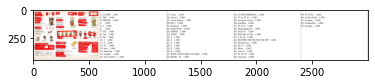

Process time: 30.652458429336548


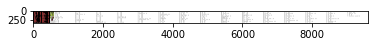

Process time: 91.68016529083252


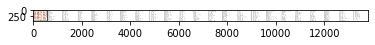

Process time: 221.98949599266052


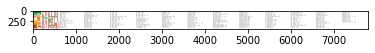

Process time: 99.9045991897583


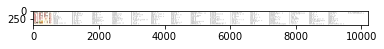

Process time: 184.47772216796875


True

In [6]:
import time


def prepare_data_folder(path_folders_in,
                       path_folder_root_out):
    
    if not os.path.exists(path_folders_in) or len(os.listdir(path_folders_in)) == 0:
        return False

    folder_in_name = path_folders_in.split("/")[-1]
    path_folders_out = os.path.join(path_folder_root_out, folder_in_name)
    # print(path_folders_out)
    if not os.path.exists(path_folders_out):
        os.makedirs(path_folders_out)
    
    for folder_name in os.listdir(path_folders_in):
        path_folder = os.path.join(path_folders_in, folder_name)
        for i, file_image in enumerate(os.listdir(path_folder)):            
            try:
                start_time = time.time()
                path_file_image = os.path.join(path_folder, file_image)
                # print(path_file_image)
                _, _, output = recognize_from_path_image(path_file_image) 
                if output == None:
                    continue
#                 print(type(output))
#                 print(output)
                
                file_txt = "{}_{:03d}.txt".format(folder_name, i)
                path_file_txt = os.path.join(path_folders_out, file_txt)
                with open(path_file_txt, "w") as wf:
                    wf.write(output)
                stop_time = time.time()
                print("Process time: {}".format(stop_time - start_time))
                    
            except Exception as e:
                print("Error: {}".format(e))
                continue
    return True

path_folder_in = "/home/giangnv/Desktop/projects_/ScanBill/workspace/myOCR/test/images/menu"
path_folder_root_out = "/home/giangnv/Desktop/projects_/ScanBill/workspace/documenClassifcation/viblo_document_classify/VNTC/Data/custom_data/menu"                                

prepare_data_folder(path_folder_in,
                   path_folder_root_out)                                            

### Run full dataset to get dataset

In [ ]:
# RUN THE CODE TO PREPARE DATA
path_folder_root_in = "/home/giangnv/Desktop/projects_/ScanBill/workspace/documenClassifcation/google-images-download/dataset"
path_folder_root_out = "/home/giangnv/Desktop/projects_/ScanBill/workspace/documenClassifcation/viblo_document_classify/VNTC/Data/custom_data/full_converted_dataset"                                
for folder_in in os.listdir(path_folder_root_in):
    path_folder_in = os.path.join(path_folder_root_in, folder_in)
    prepare_data_folder(path_folder_in,
                   path_folder_root_out)      